In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/', force_remount=True)

Mounted at /content/MyDrive/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import auc, roc_curve, precision_recall_curve, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler


winedf=pd.read_csv('/content/MyDrive/MyDrive/wine.data.txt', header = None)
winedf.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
winedf

,Label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Hезультат химического анализа вин, выращенных в одном и том же регионе Италии, но полученных из трех разных сортов. Анализ определил количество 13 компонентов, обнаруженных в каждом из трех типов вин.

Алкоголь, Яблочная кислота, Зола, Щелочность золы, Магний, Общее количество фенолов, Флаваноиды, Нефлаваноидные фенолы, Проантоцианы, Интенсивность цвета, Оттенок, OD280/OD315 разбавленных вин, Пролин

2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [ ]:
winedf.drop_duplicates(inplace=True)

winedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Label                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

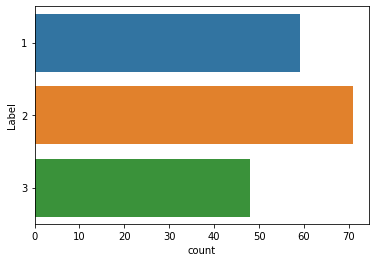

In [ ]:
sns.countplot(data = winedf, y='Label')

4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

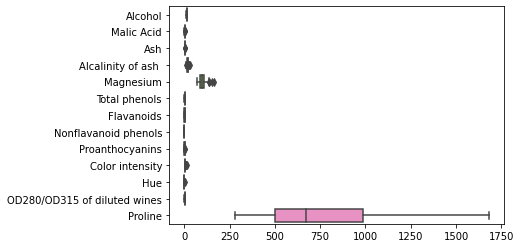

In [ ]:
numerical_signs = winedf.drop('Label', axis = 1)
sns.boxplot(data = numerical_signs, orient = 'h')

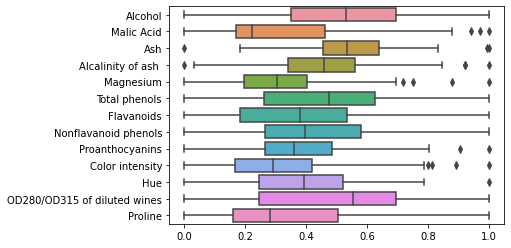

In [ ]:
scaler = MinMaxScaler()
columns = numerical_signs.columns
numerical_signs[columns] = scaler.fit_transform(numerical_signs[columns])
sns.boxplot(data = numerical_signs, orient = 'h')

Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [ ]:
winedf = pd.get_dummies(winedf, columns = ['Label'])
winedf

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Label_1,Label_2,Label_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,0,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0,0,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0,0,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0,0,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0,0,1


6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

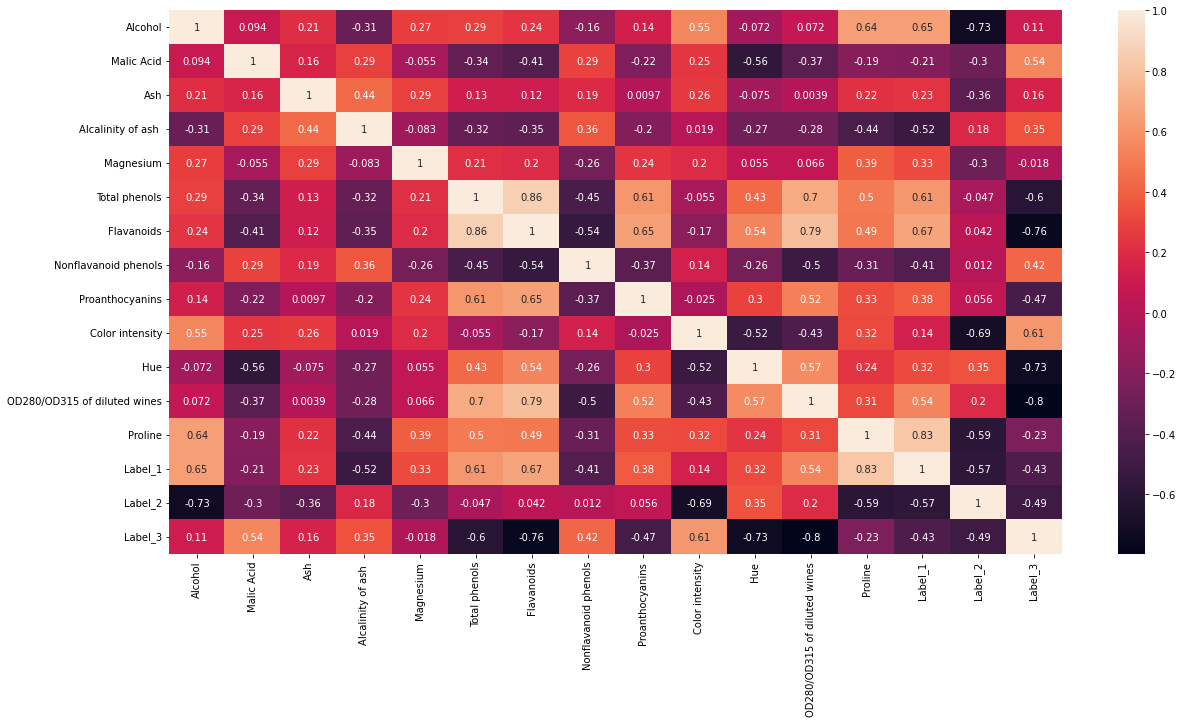

In [ ]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(winedf.corr(), annot=True)


Положимельный коэф корреляции - прямая зависимость между признаками

Отрицательный коэф корреляции - обратная зависимость между признаками

Коэф корреляуии близкий к 0 - признаки не зависимы

7.	Заполните пропущенные значения в данных;

In [ ]:
winedf.count().isna()

Alcohol                         False
Malic Acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
Label_1                         False
Label_2                         False
Label_3                         False
dtype: bool

Пропущенных значений нет

8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [ ]:
winedf.columns

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Label_1', 'Label_2',
       'Label_3'],
      dtype='object')

In [ ]:
x = numerical_signs
y = winedf['Label_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': [10, 3, 4],
          'weights': ['uniform', 'distance']}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(x_train, y_train)
y_score = rnc_grid.best_estimator_.fit(x_train, y_train).predict(x_test)
print('Лучшее: %.7f'%(rnc_grid.best_score_))
print('Оценка точности: %.7f'%(accuracy_score(y_test, y_score)))



Лучшее: 0.7605911
Оценка точности: 0.6944444


Линейный классификатор (Персептрон)

In [ ]:
per = Perceptron()
params = {
    'alpha' : np.arange(0.00001, 0.001, 0.00005),
}

per_grid = GridSearchCV(per, param_grid=params)
per_grid.fit(x_train, y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid={'alpha': array([1.0e-05, 6.0e-05, 1.1e-04, 1.6e-04, 2.1e-04, 2.6e-04, 3.1e-04,
       3.6e-04, 4.1e-04, 4.6e-04, 5.1e-04, 5.6e-04, 6.1e-04, 6.6e-04,
       7.1e-04, 7.6e-04, 8.1e-04, 8.6e-04, 9.1e-04, 9.6e-04])})

In [ ]:
best_alpha = per_grid.best_estimator_.alpha
best_score = per_grid.best_score_

print(f'best train score: {best_score:.4f}\t at alpha: {best_alpha}')

best train score: 0.9581	 at alpha: 1e-05


In [ ]:
per = Perceptron(alpha=best_alpha)
per.fit(x_train, y_train)

Perceptron(alpha=1e-05)

In [ ]:
prob_rnc = rnc_grid.predict_proba(x_test)
prob_rnc

array([[0.50592535, 0.49407465],
       [0.75282722, 0.24717278],
       [0.6546205 , 0.3453795 ],
       [0.51302925, 0.48697075],
       [0.68683488, 0.31316512],
       [0.6628245 , 0.3371755 ],
       [0.51349602, 0.48650398],
       [0.78056822, 0.21943178],
       [0.73364852, 0.26635148],
       [0.76412873, 0.23587127],
       [0.74756584, 0.25243416],
       [0.77078396, 0.22921604],
       [0.47422296, 0.52577704],
       [0.62668494, 0.37331506],
       [0.7541474 , 0.2458526 ],
       [0.72288992, 0.27711008],
       [0.56647499, 0.43352501],
       [0.50512644, 0.49487356],
       [0.75444777, 0.24555223],
       [0.48919292, 0.51080708],
       [0.62814876, 0.37185124],
       [0.57033795, 0.42966205],
       [0.60425685, 0.39574315],
       [0.69424025, 0.30575975],
       [0.73870683, 0.26129317],
       [0.72416233, 0.27583767],
       [0.70643904, 0.29356096],
       [0.7535277 , 0.2464723 ],
       [0.73440157, 0.26559843],
       [0.7757816 , 0.2242184 ],
       [0.

In [ ]:
prob_per = per._predict_proba_lr(x_test)
prob_per

array([[2.64403440e-02, 9.73559656e-01],
       [9.83546139e-01, 1.64538612e-02],
       [9.03741461e-01, 9.62585390e-02],
       [9.56362103e-02, 9.04363790e-01],
       [8.62614590e-01, 1.37385410e-01],
       [8.39062900e-01, 1.60937100e-01],
       [4.68553829e-03, 9.95314462e-01],
       [9.85671698e-01, 1.43283019e-02],
       [9.38842619e-01, 6.11573806e-02],
       [9.81753117e-01, 1.82468835e-02],
       [7.84791154e-01, 2.15208846e-01],
       [9.71110674e-01, 2.88893261e-02],
       [1.68980016e-03, 9.98310200e-01],
       [6.28912085e-01, 3.71087915e-01],
       [9.41682776e-01, 5.83172239e-02],
       [9.84541340e-01, 1.54586597e-02],
       [2.27478270e-02, 9.77252173e-01],
       [6.63935645e-04, 9.99336064e-01],
       [9.71965473e-01, 2.80345266e-02],
       [1.24491996e-02, 9.87550800e-01],
       [6.35059861e-01, 3.64940139e-01],
       [1.40880846e-01, 8.59119154e-01],
       [3.59788793e-01, 6.40211207e-01],
       [8.48725259e-01, 1.51274741e-01],
       [9.252350

In [ ]:
y_test, prob_rnc

(54     1
 151    0
 63     0
 55     1
 123    0
 121    0
 7      1
 160    0
 106    0
 90     0
 141    0
 146    0
 5      1
 98     0
 168    0
 80     0
 33     1
 18     1
 61     0
 51     1
 66     0
 37     1
 4      1
 104    0
 60     0
 111    0
 126    0
 86     0
 112    0
 164    0
 26     1
 56     1
 129    0
 45     1
 8      1
 44     1
 Name: Label_1, dtype: uint8, array([[0.50592535, 0.49407465],
        [0.75282722, 0.24717278],
        [0.6546205 , 0.3453795 ],
        [0.51302925, 0.48697075],
        [0.68683488, 0.31316512],
        [0.6628245 , 0.3371755 ],
        [0.51349602, 0.48650398],
        [0.78056822, 0.21943178],
        [0.73364852, 0.26635148],
        [0.76412873, 0.23587127],
        [0.74756584, 0.25243416],
        [0.77078396, 0.22921604],
        [0.47422296, 0.52577704],
        [0.62668494, 0.37331506],
        [0.7541474 , 0.2458526 ],
        [0.72288992, 0.27711008],
        [0.56647499, 0.43352501],
        [0.50512644, 0.49487356],

In [ ]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
y_test_bin

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
y_score

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
clf = OneVsRestClassifier(RadiusNeighborsClassifier(10))
clf.fit(x_train, y_train)

yscore = clf.predict_proba(x_test)

In [ ]:
yscore

array([[0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.68309859, 0.31690141],
       [0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


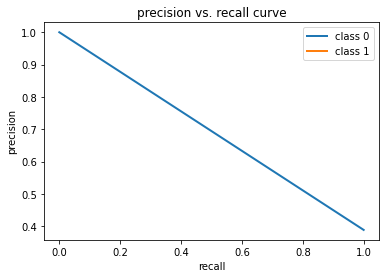

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(2):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                        yscore[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


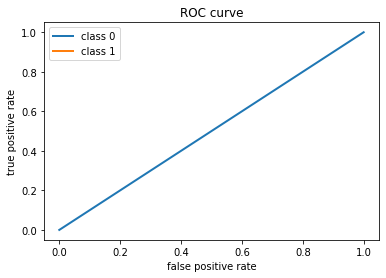

In [ ]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i],
                                  yscore[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

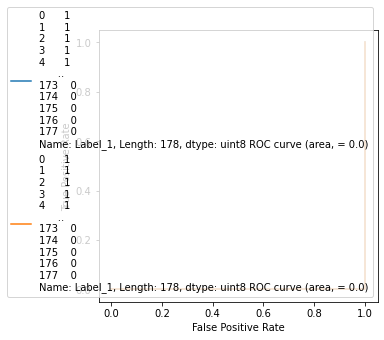

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


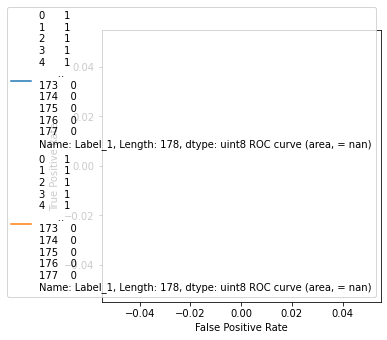

In [ ]:
for i in range(prob_rnc.shape[1]):
    plt.figure(figsize=(5, 5)) # Размер изображения

    tpr, fpr, thresholds = roc_curve(y_test_bin[:, i], -prob_rnc[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{&&&&&&&&&&&} ROC curve (area, = {roc_auc})')
    
    tpr, fpr, thresholds = roc_curve(y_test_bin[:, i], -prob_per[:, i], pos_label=True)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{&&&&&&&} ROC curve (area, = {roc_auc})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend(loc='lower right', fontsize='medium')
    plt.show()